Start with our usual setup, including the utility methods from last time.

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# provide methods for loading and displaying images
def load(image_path):
    out = io.imread(image_path)
    out = out.astype(np.float64) / 255
    return out

def display(img, title=None):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
# Function to display time a function took
def timing(f, args):
    time1 = time()
    output = f(*args)
    time2 = time()
    print('{} function took {} seconds'.format(f.__name__, round(time2-time1, 5)))
    return output
    
# As usual, you may use your own images, but you must include them in your submission.
image_path = './image1.jpg'

image = load(image_path)

We provide a naive implementation of a grayscale convolutional filter:

In [2]:
def naive_convolution_filter(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    # Generate blank image to be filled in
    out = np.zeros(image.shape)
    
    # Iterate over image rows and columns
    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):
            
            # Initialize the value for this pixel at 0
            output_value = 0
            
            # Iterate over kernel rows and columns
            for kernel_row in range(kernel.shape[0]):
                for kernel_column in range(kernel.shape[1]):
                    
                    # Find current offset from center of kernel
                    image_row_offset = math.ceil(kernel_row - kernel.shape[0] / 2)
                    image_column_offset = math.ceil(kernel_column - kernel.shape[1] / 2)
                    
                    # Check if offset goes out of image bounds
                    if (image_row + image_row_offset < 0 or 
                        image_row + image_row_offset >= image.shape[0] or
                        image_column + image_column_offset < 0 or 
                        image_column + image_column_offset >= image.shape[1]):
                        
                        # If so, set image value to 0
                        image_value = 0
                    else:
                        
                        # Get image value at currently considered position
                        image_value = image[image_row + image_row_offset, image_column + image_column_offset]
                    
                    # Augment output value by image value times kernel value
                    output_value += image_value * kernel[kernel_row, kernel_column]
            
            # Set outut image pixel
            out[image_row, image_column] = output_value
            
    return out

## Exercise 1

1. Take a look at the filters in the following code cell. What do you think they do? You may want to run display() on the filter to visualize it.
2. Run the filters using `naive_convolution_filter` to verify your answer.

In [3]:
filter1 = np.array(
[
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,1],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

filter2 = np.array(
[
    [0,0,0],
    [0,2,0],
    [0,0,0]
])

# Hint: check the lecture slides for a familiar-looking filter
filter3 = np.array(
[
    [-.11,-.11,-.11],
    [-.11,1.88,-.11],
    [-.11,-.11,-.11],
])


The first filter shifts the image left by two pixels, as it just replaces every value by the value two pixels directly to the right. The second filter doubles the image brightness. The final kernel is a sharpening kernel that increases the brightness of the central pixel while subtracting out the values of the adjacent ones, thereby increasing contrast.

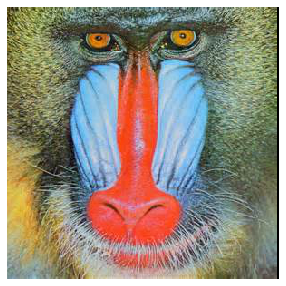

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


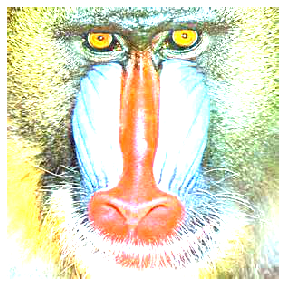

In [ ]:
display(naive_convolution_filter(image, filter1))

display(naive_convolution_filter(image, filter2))

display(naive_convolution_filter(image, filter3))

## Exercise 2
So far, we've only run the naive implementation on a grayscale image. Add a color image of your choice and run a filter on it, showing both the original image and the output of the filter.

As you can see, the filter runs on all three channels. Create an implementation that allows applying different filters to each channel, and submit the output of using at least two different filters on the same image.

In [ ]:
def conv_by_channel(image, filter1, filter2, filter3):
    """
    Args:
        image: numpy array of shape (Hi, Wi, 3).
        kernel1: numpy array of shape (Hk, Wk).
        kernel2: numpy array of shape (Hk, Wk).
        kernel3: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi, 3).
    """
    # Make a blank image to be filled in 
    out = np.zeros(image.shape)
    
    # Modify each channel separately using the convolution_filter on one channel
    # Fill in each channel of the output with the results
    out[:, :, 0] = convolution_filter(image[:, :, 0], filter1, channel='single')
    out[:, :, 1] = convolution_filter(image[:, :, 1], filter2, channel='single')
    out[:, :, 2] = convolution_filter(image[:, :, 2], filter3, channel='single')
    
    return out

In [ ]:
display(conv_by_channel(image, filter1, filter2, filter3))

## Exercise 3
Create your own filter(s) and describe their output.

In [ ]:
# Size of kernel
n=11

# Make a grid to apply functions on
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
xv, yv = np.meshgrid(x, y)

# Normalized gaussian
gauss_filter = np.exp(-xv**2-yv**2)
gauss_filter = gauss_filter/np.sum(gauss_filter)

# Normalized inverse gaussian
inverse_gauss = np.exp(10*(xv**2+yv**2))
inverse_gauss = inverse_gauss/np.sum(inverse_gauss)

In [ ]:
display(convolution_filter(image, gauss_filter))
display(convolution_filter(image, inverse_gauss))

Displayed above are two different filter types. 

The first is a Gaussian filter which has values given by a Gaussian ($\exp(-r^2)$) evlauted on a 2d grid of points around the origin; the values are normalized so they sum to 1. The effect of applying this filter is to blur the image, as every point becomes weighted average of the surrounding points.

The second is an 'inverse' Gaussian filter, which is the same as the Gaussian filter but with a coefficient of -10 in the exponent (the 10 here just makes the effect more extreme and is otherwise unnecessary). The effect of the filter is rather chaotic; rather than emphasizing the points close to the center of the filter, this filter instead emphasize the points far from the center. As such, it sorta looks like multiple copies of the image have been overlayed, corresponding to the translations caused by the filter's empahsis on border values.

In [ ]:
# Create empty array with final kernel size
average_filter = np.zeros((n,n))

# Put value 1/n^2 in every array entry so the total sum is 1
average_filter[:,:] = n**(-2)

display(convolution_filter(image, average_filter))

This filter is a simple averaging filter. I personally find this much worse looking than the Gaussian blur.

In [ ]:
# The two Sobel edge filters
# Finds horizontal edges
edge_filter_h = np.array([[-1, 0, 1], 
                          [-2, 0, 2],
                          [-1, 0, 1]])

# Finds vertical edges
edge_filter_v = np.rot90(edge_filter_h)

display(convolution_filter(image, edge_filter_h))
display(convolution_filter(image, edge_filter_v))

Horizontal and vertical edge detection.

## Advanced exercise 1

Recall from lecture that at the edges, filters only partially overlap with the image pixels, so we need a way to provide numbers that are out of bounds. The provided implementation uses the strategy we discussed in lecture, zero-padding, which just treats all out-of-bounds pixels as zero.

A different strategy is edge value replication: treat all out-of-bounds pixels as having the same value as the closest in-bounds pixel. Another one is mirror extension: treat the border of the image as a mirror, and use the pixel value that would be reflected into the out-of-bounds space. These are not the only strategies -- you're welcome to research others on your own.

Modify naive_convolutional_filter to implement one or more of these strategies. How does that change the output of filters?

In [ ]:
def edge_convolution_filter(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    # Get shapes of image and kernel
    img_shape = image.shape
    kern_height, kern_width = kernel.shape
    
    # Make a blank image to be filled in
    out = np.zeros(img_shape)
    
    """
    The point of the following lines is to prepad the image with a border of
    0s, avoiding checking if the kernel is overflowing.
    
    Uneven front and back paddings (i.e. kern±1) are to handle even kernel sizes.
    
    The padding mode has been set to edge.
    """  
    padding_shape = (((kern_height-1)//2, (kern_height+1)//2), ((kern_width-1)//2, (kern_width+1)//2), (0,0))
    image = np.pad(image, padding_shape, mode='edge')
    
    # Iterate over the image's columns and rows
    for image_row in range(img_shape[0]):
        for image_col in range(img_shape[1]):

            # We extract a sub-image from the image with same dimension as the kernel
            sub_image = image[image_row:image_row+kern_height, image_col:image_col+kern_width, :]

            # We element-wise multiply and then sum the entries of the sub-image and kernel 
            output_value = np.einsum('ij...,ij', sub_image, kernel)

            # We set the output image's value at the current position to the calculated value
            out[image_row, image_col] = output_value
                
    return out

In [ ]:
# Size of kernel
n=51

# Make a grid to apply functions on
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
xv, yv = np.meshgrid(x, y)

# Normalized gaussian
gauss_filter = np.exp(-xv**2-yv**2)
gauss_filter = gauss_filter/np.sum(gauss_filter)

# Normalized inverse gaussian
inverse_gauss = np.exp(10*(xv**2+yv**2))
inverse_gauss = inverse_gauss/np.sum(inverse_gauss)

In [ ]:
display(convolution_filter(image, gauss_filter))
display(edge_convolution_filter(image, gauss_filter))

As you can see, using the edge padding mode significantly lessens the darkening around the edge of the image.

In [ ]:
def edge_naive_convolution_filter(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    # Generate blank image to be filled in
    out = np.zeros(image.shape)
    
    # Iterate over image rows and columns
    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):
            
            # Initialize the value for this pixel at 0
            output_value = 0
            
            # Iterate over kernel rows and columns
            for kernel_row in range(kernel.shape[0]):
                for kernel_column in range(kernel.shape[1]):
                    
                    # Find current offset from center of kernel
                    image_row_offset = math.ceil(kernel_row - kernel.shape[0] / 2)
                    image_column_offset = math.ceil(kernel_column - kernel.shape[1] / 2)
                    
                    # Find current pixel's position by adding kernel center and offset
                    current_row = image_row + image_row_offset
                    current_column = image_column + image_column_offset
                    
                    # Check if current pixel is out o fbounds
                    if (current_row < 0 or current_row >= image.shape[0] or
                        current_column < 0 or current_column >= image.shape[1]):
                        
                        # Find closest edge
                        edge_row = min(current_row, image.shape[0]-1) - min(current_row, 0) 
                        
                        # Find closest column
                        edge_column = min(current_column, image.shape[1]-1) - min(current_column, 0) 
                        
                        # Get image value at closest point
                        image_value = image[edge_row, edge_column]
                    else:
                        # Get image value at current point
                        image_value = image[current_row, current_column]
                    
                    # Augment output value by image value times kernel value
                    output_value += image_value * kernel[kernel_row, kernel_column]
            
            # Set outut image pixel
            out[image_row, image_column] = output_value
            
    return out

The magical edge finding functions 

`min(current_row, image.shape[0]-1) - min(current_row, 0) `

`min(current_column, image.shape[1]-1) - min(current_column, 0) `

were found by playing around a bit on Desmos. Here is a link to the Desmos I played on: https://www.desmos.com/calculator/xdv2oufpfg.

My basic thought process for finding these functions was that $\max(x, 0)$ and maybe $\min(x, L)$ (with $L$ the square edge length) are sorta able to find the edges of a square. As such, maybe they could be combined to genuinely find the closest edge. After playing around for a bit, I found that the above combinations actually do exactly what I want them to.

I ended up doing a similar thing for reflecting about the edge, which is also in the Desmos. By replacing the functions for `edge_row` and `edge_column`, you could get a reflection-based edge padding.

In [ ]:
naive_edge_filtered = timing(edge_naive_convolution_filter, (image, filter1))
edge_filtered = timing(edge_convolution_filter, (image, filter1))

In [ ]:
# To check the two arrays are equal, we use .all()
(naive_edge_filtered == edge_filtered).all()

## Advanced exercise 2

You may have noticed that `naive_convolutional_filter` is quite slow. Create an implementation that is faster, using the `time` library to demonstrate the difference in performance. Your implementation must return the same output as the naive implementation.


In [ ]:
def convolution_filter(image, kernel, channel='multi'):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    # Get shapes of image and kernel
    img_shape = image.shape
    kern_height, kern_width = kernel.shape
    
    # Make a blank image to be filled in
    out = np.zeros(img_shape)
    
    """
    The point of the following lines is to prepad the image with a border of
    0s, avoiding checking if the kernel is overflowing.
    
    Uneven front and back paddings (i.e. kern±1) are to handle even kernel sizes.
    
    If only a single channel is being inputted, the pad shape needs to be slightly different.
    """
    if channel == 'single':
        padding_shape = (((kern_height-1)//2, (kern_height+1)//2), ((kern_width-1)//2, (kern_width+1)//2))
    else:
        padding_shape = (((kern_height-1)//2, (kern_height+1)//2), ((kern_width-1)//2, (kern_width+1)//2), (0,0))
    
    image = np.pad(image, padding_shape)
    
    # Iterate over the image's columns and rows
    if channel == 'single':
        for image_row in range(img_shape[0]):
            for image_col in range(img_shape[1]):

                # We extract a sub-image from the image with same dimension as the kernel
                sub_image = image[image_row:image_row+kern_height, image_col:image_col+kern_width]

                # We element-wise multiply and then sum the entries of the sub-image and kernel 
                output_value = np.einsum('ij,ij', sub_image, kernel)

                # We set the output image's value at the current position to the calculated value
                out[image_row, image_col] = output_value
    else:
        for image_row in range(img_shape[0]):
            for image_col in range(img_shape[1]):
                
                # Same thing as above but on all channels
                sub_image = image[image_row:image_row+kern_height, image_col:image_col+kern_width, :]
                
                output_value = np.einsum('ij...,ij', sub_image, kernel)
                
                out[image_row, image_col] = output_value
            
    return out

In [ ]:
naive_filtered = timing(naive_convolution_filter, (image, filter1))
filtered = timing(convolution_filter, (image, filter1))

In [ ]:
# To check the two arrays are equal, we use .all()
(naive_filtered == filtered).all()

In [ ]:
display(naive_filtered)
display(filtered)